In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#convert txt to csv
import time
start=time.time()
#loading output_longname.txt file and writing a new csv file for future use
output_longname = open('/scratch/myang_shared/lab/Skyler/output_longname2.txt')
output_csv = open('/scratch/myang_shared/lab/Skyler/output_longname2.csv','w')

#start a header for csv file
output_csv.write('Source1' + ',' + 'Source2' + ',' + 'Target' + ',' + 'f_3' + ',' + 'Std_Err' + ',' + 'Z_value' + ',' + 'SNPs' + '\n' )

#lighter way to read lines in file
for line in output_longname:
    #split lines into lists by '\n'
    aList = line.split()
    #find the database
    if aList[0].startswith('result:'):
        output_csv.write(aList[1] + ',' + aList[2] + ',' + aList[3] + ',' + aList[4] + ',' + aList[5] + ',' + aList[6] + ',' + aList[7] + '\n')
        
        
end = time.time()
print('Time:',end-start)
output_longname.close()
output_csv.close()      

Time: 0.04069232940673828


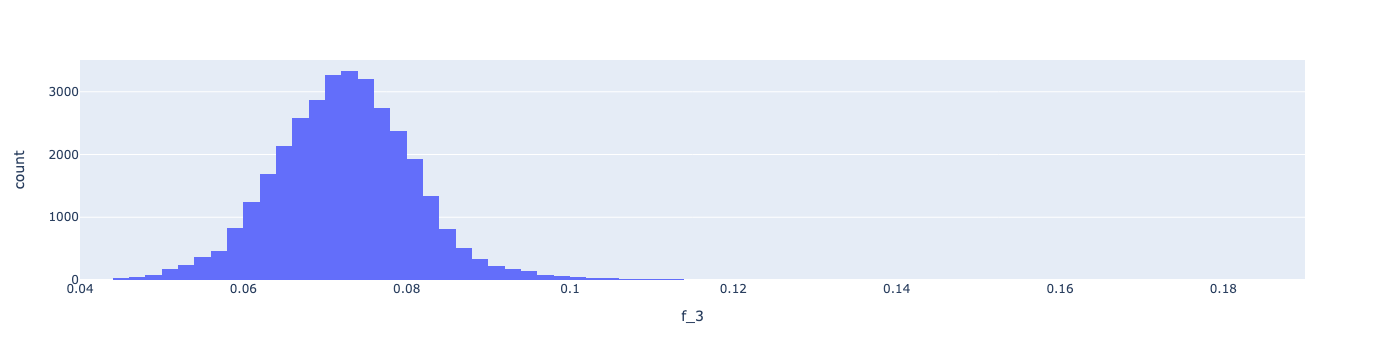

Source1          Source2         Target       f_3   Std_Err  \
0      CM_2019_late_F_10       zind_NC_06  zind_Kenya_01  0.063335  0.005590   
1      CM_2019_late_F_10       zind_NC_05  zind_Kenya_01  0.077751  0.005221   
2      CM_2019_late_F_10       zind_NC_04  zind_Kenya_01  0.072207  0.004973   
3      CM_2019_late_F_10       zind_NC_03  zind_Kenya_01  0.081732  0.006011   
4      CM_2019_late_F_10       zind_NC_02  zind_Kenya_01  0.065160  0.006673   
...                  ...              ...            ...       ...       ...   
33448    CM_2019_mid_M_9  CM_2019_mid_M_1  zind_Kenya_01  0.098869  0.009356   
33449    CM_2019_mid_M_9  CM_2019_mid_M_2  zind_Kenya_01  0.116401  0.022115   
33450    CM_2019_mid_M_9  CM_2019_mid_M_3  zind_Kenya_01  0.075661  0.007555   
33451    CM_2019_mid_M_9  CM_2019_mid_M_4  zind_Kenya_01  0.070596  0.005052   
33452    CM_2019_mid_M_9  CM_2019_mid_M_5  zind_Kenya_01  0.064399  0.004023   

       Z_value    SNPs  
0       11.329  100291  
1       14.893   97315  
2       14.521   98271  
3       13.598   97642  
4        9.765   99935  
...        ...     ...  
33448   10.567   88609  
33449    5.263   88154  
33450   10.014   93008  
33451   13.974   91672  
33452   16.008   92786  

[33453 rows x 7 columns]

In [4]:
#loading csv file
dfoutput = pd.read_csv('/scratch/myang_shared/lab/Skyler/output_longname2.csv')
#using plotly to create histogram
fig = px.histogram(dfoutput, x="f_3", nbins=100)
fig.show()
#dfoutput['f_3']>=0.09, higher concentrated 
dfhighf3 = dfoutput[dfoutput['f_3']>=0.09]
#dfhighf3.head(10)
dfoutput


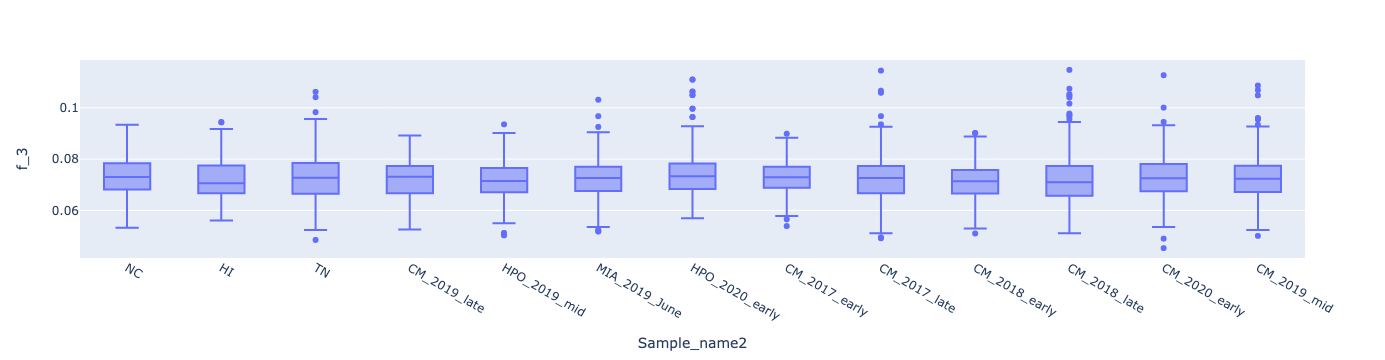

Source1          Source2         Target       f_3   Std_Err  \
0      CM_2019_late_F_10       zind_NC_06  zind_Kenya_01  0.063335  0.005590   
1      CM_2019_late_F_10       zind_NC_05  zind_Kenya_01  0.077751  0.005221   
2      CM_2019_late_F_10       zind_NC_04  zind_Kenya_01  0.072207  0.004973   
3      CM_2019_late_F_10       zind_NC_03  zind_Kenya_01  0.081732  0.006011   
4      CM_2019_late_F_10       zind_NC_02  zind_Kenya_01  0.065160  0.006673   
...                  ...              ...            ...       ...       ...   
33448    CM_2019_mid_M_9  CM_2019_mid_M_1  zind_Kenya_01  0.098869  0.009356   
33449    CM_2019_mid_M_9  CM_2019_mid_M_2  zind_Kenya_01  0.116401  0.022115   
33450    CM_2019_mid_M_9  CM_2019_mid_M_3  zind_Kenya_01  0.075661  0.007555   
33451    CM_2019_mid_M_9  CM_2019_mid_M_4  zind_Kenya_01  0.070596  0.005052   
33452    CM_2019_mid_M_9  CM_2019_mid_M_5  zind_Kenya_01  0.064399  0.004023   

       Z_value    SNPs   Sample_name Sample_name2  
0       11.329  100291  CM_2019_late           NC  
1       14.893   97315  CM_2019_late           NC  
2       14.521   98271  CM_2019_late           NC  
3       13.598   97642  CM_2019_late           NC  
4        9.765   99935  CM_2019_late           NC  
...        ...     ...           ...          ...  
33448   10.567   88609   CM_2019_mid  CM_2019_mid  
33449    5.263   88154   CM_2019_mid  CM_2019_mid  
33450   10.014   93008   CM_2019_mid  CM_2019_mid  
33451   13.974   91672   CM_2019_mid  CM_2019_mid  
33452   16.008   92786   CM_2019_mid  CM_2019_mid  

[33453 rows x 9 columns]

In [5]:
#create a list of our conditions
conditions = [(dfoutput['Source1'].str.startswith('CM_2019_late')), 
              (dfoutput['Source1'].str.startswith('HPO_2019_mid')),
              (dfoutput['Source1'].str.startswith('MIA_2019_June')),
              (dfoutput['Source1'].str.startswith('HPO_2020_early')),
              (dfoutput['Source1'].str.startswith('CM_2017_early')),
              (dfoutput['Source1'].str.startswith('CM_2017_late')),
              (dfoutput['Source1'].str.startswith('CM_2018_early')),
              (dfoutput['Source1'].str.startswith('CM_2018_late')),
              (dfoutput['Source1'].str.startswith('CM_2020_early')),
              (dfoutput['Source1'].str.startswith('CM_2019_mid'))]
conditions2 = [(dfoutput['Source2'].str.contains('NC')),
               (dfoutput['Source2'].str.contains('HI')),
               (dfoutput['Source2'].str.contains('TN')),
               (dfoutput['Source2'].str.startswith('CM_2019_late')), 
              (dfoutput['Source2'].str.startswith('HPO_2019_mid')),
              (dfoutput['Source2'].str.startswith('MIA_2019_June')),
              (dfoutput['Source2'].str.startswith('HPO_2020_early')),
              (dfoutput['Source2'].str.startswith('CM_2017_early')),
              (dfoutput['Source2'].str.startswith('CM_2017_late')),
              (dfoutput['Source2'].str.startswith('CM_2018_early')),
              (dfoutput['Source2'].str.startswith('CM_2018_late')),
              (dfoutput['Source2'].str.startswith('CM_2020_early')),
              (dfoutput['Source2'].str.startswith('CM_2019_mid'))]
#create a list of the values we want to assign for 
values = ['CM_2019_late',
          'HPO_2019_mid',
          'MIA_2019_June',
          'HPO_2020_early',
          'CM_2017_early',
          'CM_2017_late',
          'CM_2018_early',
          'CM_2018_late',
          'CM_2020_early',
          'CM_2019_mid']
values2 = ['NC',
           'HI',
           'TN',
           'CM_2019_late',
          'HPO_2019_mid',
          'MIA_2019_June',
          'HPO_2020_early',
          'CM_2017_early',
          'CM_2017_late',
          'CM_2018_early',
          'CM_2018_late',
          'CM_2020_early',
          'CM_2019_mid']

dfoutput['Sample_name'] = np.select(conditions,values)
dfoutput['Sample_name2'] = np.select(conditions2,values2)

#condition 3 in order to build boxplot

"""for v2 in values2:
    conditions3 = [(dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2), 
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2), 
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2), 
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2), 
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2), 
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),
                   (dfoutput['Sample_name'] == 'CM_2019_late' & dfoutput['Sample_name2'] == v2 | dfoutput['Sample_name2'] == 'CM_2019_late' & dfoutput['Sample_name'] == v2),]
values3 = ['CM_2019_late vs NC',
           'CM_2019_late vs HI',
           'CM_2019_late vs TN',
           'Within',
           'CM_2019_late vs HPO_2019_mid',
           'CM_2019_late vs MIA_2019_June',
           'CM_2019_late vs HPO_2020_early',
           'CM_2019_late vs CM_2017_early',
           'CM_2019_late vs CM_2017_late',
           'CM_2019_late vs CM_2017_late',
           'CM_2019_late vs CM_2018_early',
           'CM_2019_late vs CM_2018_early',
           'CM_2019_late vs CM_2020_early'
           'CM_2019_late vs CM_2019_mid']
           
dfoutput['Sample_name3'] = np.select(conditions3,values3)                   
#fig1 = px.box(dfoutput, x="Sample_name", y="f_3")
#fig1.show()
sort individual names
-> downthere is within
remove duplicates[sample size] """

#t-test, significance,variance,

#dfoutput
dfCM19L = dfoutput[dfoutput['Sample_name'] == 'HPO_2020_early']
fig1 = px.violin(dfCM19L, x = "Sample_name2", y="f_3")
#fig1.show()
#dfCM19L

dfCM18L = dfoutput[dfoutput['Sample_name'] == 'HPO_2020_early']
fig2 = px.box(dfCM18L, x = "Sample_name2", y="f_3")
fig2.show()
#dfCM18L
#within left
#SOURCE2 ORDERLY

#site together MIA,NC,HI,TN,HPO,CM,
#TOTAL number of each comparison
"""double checking the number in boxplot
"""

dfoutput


In [37]:
"""
change the order:
create a new dataset and list index
and merge these two datasets
sort based on index """

dfindex = dfoutput[['Sample_name2']]
#rename column
dfindex = dfindex.rename(columns={'Sample_name2':'Sample_name_ordered'})
               
conditions3 = [(dfindex['Sample_name_ordered'].str.startswith('MIA_2019_June')),
               (dfindex['Sample_name_ordered'].str.startswith('NC')),
               (dfindex['Sample_name_ordered'].str.startswith('HI')),
               (dfindex['Sample_name_ordered'].str.startswith('TN')),
               (dfindex['Sample_name_ordered'].str.startswith('HPO_2019_mid')),
               (dfindex['Sample_name_ordered'].str.startswith('HPO_2020_early')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2017_early')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2017_late')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2018_early')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2018_late')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2020_early')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2019_mid')),
              (dfindex['Sample_name_ordered'].str.startswith('CM_2019_late'))]
values3 = [0,1,2,3,4,5,6,7,8,9,10,11,12]
dfindex['index'] = np.select(conditions3,values3)

dforderedOutput = pd.concat([dfoutput, dfindex], axis=1)

dforderedOutput = dforderedOutput.sort_values('index',ascending = True)
dforderedOutput.reset_index(drop = True)
#drop the last two columns(exists for index order)
dfFinal = dforderedOutput.drop(['Sample_name_ordered','index'], axis=1).reset_index(drop = True)
dfFinal



Source1             Source2         Target       f_3  \
0       CM_2018_late_F_6  MIA_2019_June_M_13  zind_Kenya_01  0.062105   
1       CM_2018_late_M_1   MIA_2019_June_F_5  zind_Kenya_01  0.065039   
2       CM_2018_late_M_1   MIA_2019_June_F_9  zind_Kenya_01  0.064059   
3       CM_2018_late_M_1   MIA_2019_June_M_6  zind_Kenya_01  0.062603   
4       CM_2018_late_M_1   MIA_2019_June_M_7  zind_Kenya_01  0.065647   
...                  ...                 ...            ...       ...   
33448  CM_2018_early_F_1    CM_2019_late_M_4  zind_Kenya_01  0.065782   
33449  CM_2018_early_F_1    CM_2019_late_M_3  zind_Kenya_01  0.085393   
33450  CM_2018_early_F_1    CM_2019_late_F_9  zind_Kenya_01  0.066460   
33451  CM_2018_early_F_1    CM_2019_late_F_7  zind_Kenya_01  0.076147   
33452  MIA_2019_June_M_9    CM_2019_late_M_3  zind_Kenya_01  0.069315   

        Std_Err  Z_value    SNPs    Sample_name   Sample_name2  
0      0.007442    8.346   95882   CM_2018_late  MIA_2019_June  
1      0.005632   11.548   98173   CM_2018_late  MIA_2019_June  
2      0.006062   10.568   97588   CM_2018_late  MIA_2019_June  
3      0.008854    7.070   97044   CM_2018_late  MIA_2019_June  
4      0.007467    8.792   86699   CM_2018_late  MIA_2019_June  
...         ...      ...     ...            ...            ...  
33448  0.005981   10.998  136942  CM_2018_early   CM_2019_late  
33449  0.006312   13.529  131157  CM_2018_early   CM_2019_late  
33450  0.003868   17.183  140765  CM_2018_early   CM_2019_late  
33451  0.004544   16.757  123298  CM_2018_early   CM_2019_late  
33452  0.005414   12.804   89372  MIA_2019_June   CM_2019_late  

[33453 rows x 9 columns]

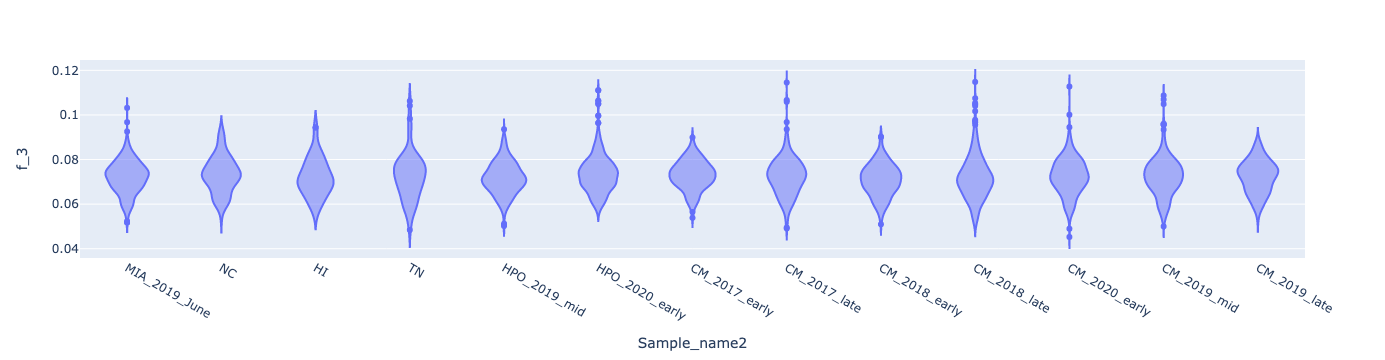

Source1             Source2         Target       f_3  \
558    HPO_2020_early_F_6   MIA_2019_June_F_6  zind_Kenya_01  0.058968   
567    HPO_2020_early_F_6  MIA_2019_June_M_13  zind_Kenya_01  0.068698   
568    HPO_2020_early_F_6  MIA_2019_June_M_12  zind_Kenya_01  0.058292   
569    HPO_2020_early_F_6  MIA_2019_June_M_11  zind_Kenya_01  0.096746   
570    HPO_2020_early_F_6  MIA_2019_June_M_10  zind_Kenya_01  0.077512   
...                   ...                 ...            ...       ...   
33279  HPO_2020_early_F_7    CM_2019_late_F_7  zind_Kenya_01  0.086480   
33280  HPO_2020_early_F_7    CM_2019_late_F_8  zind_Kenya_01  0.074733   
33281  HPO_2020_early_F_7    CM_2019_late_F_9  zind_Kenya_01  0.067783   
33282  HPO_2020_early_F_7    CM_2019_late_M_3  zind_Kenya_01  0.077135   
33283  HPO_2020_early_F_7    CM_2019_late_M_5  zind_Kenya_01  0.074466   

        Std_Err  Z_value   SNPs     Sample_name   Sample_name2  
558    0.008735    6.751  99159  HPO_2020_early  MIA_2019_June  
567    0.010278    6.684  94644  HPO_2020_early  MIA_2019_June  
568    0.008605    6.774  96955  HPO_2020_early  MIA_2019_June  
569    0.006714   14.409  93065  HPO_2020_early  MIA_2019_June  
570    0.010784    7.188  97104  HPO_2020_early  MIA_2019_June  
...         ...      ...    ...             ...            ...  
33279  0.005876   14.717  82935  HPO_2020_early   CM_2019_late  
33280  0.006991   10.690  92983  HPO_2020_early   CM_2019_late  
33281  0.004304   15.748  95329  HPO_2020_early   CM_2019_late  
33282  0.006484   11.896  90086  HPO_2020_early   CM_2019_late  
33283  0.005654   13.170  87022  HPO_2020_early   CM_2019_late  

[4347 rows x 9 columns]

In [38]:
#dfoutput
dfCM19L = dfFinal[dfFinal['Sample_name'] == 'HPO_2020_early']
fig1 = px.violin(dfCM19L, x = "Sample_name2", y="f_3")
fig1.show()
dfCM19L
#consistent x and y for f_3
#have each individual population graph
#anyone jump out between within and other pop. (outliers)
#same -> no genetic difference 
#t-test, compare within with each between =>find signfience 

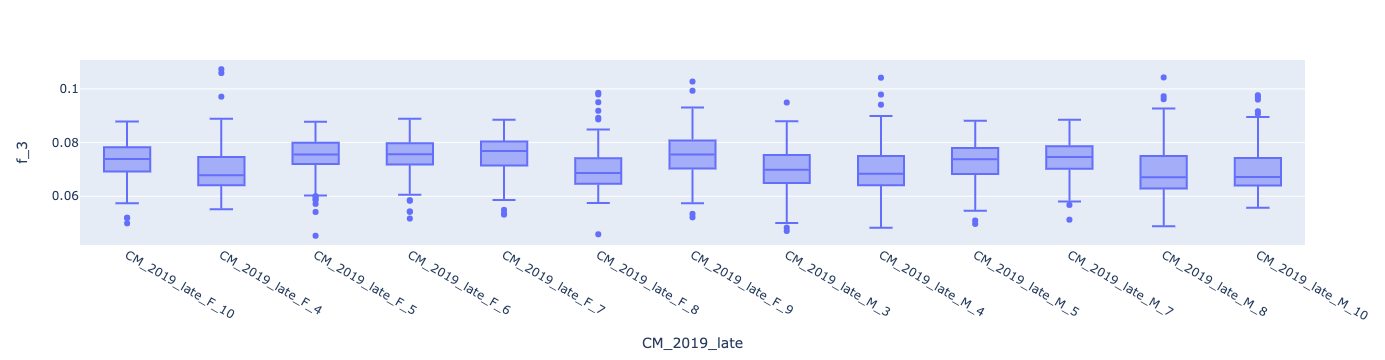

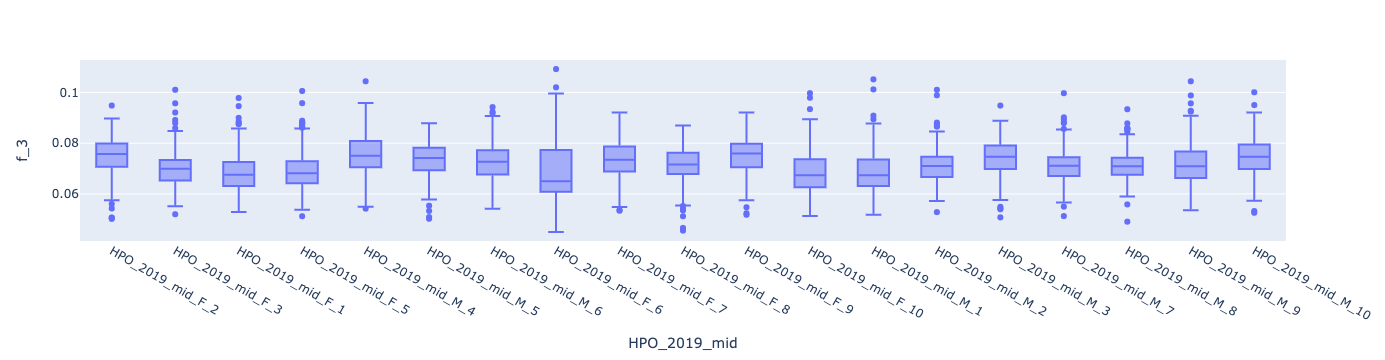

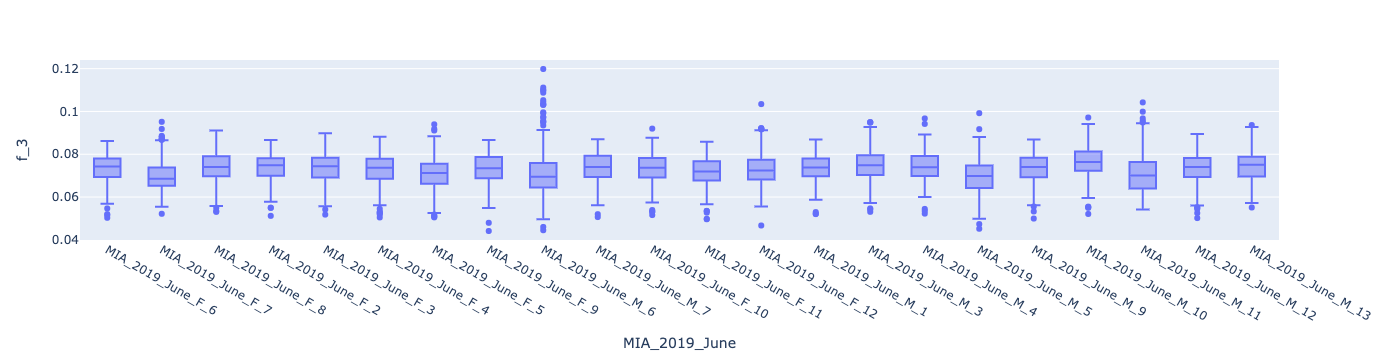

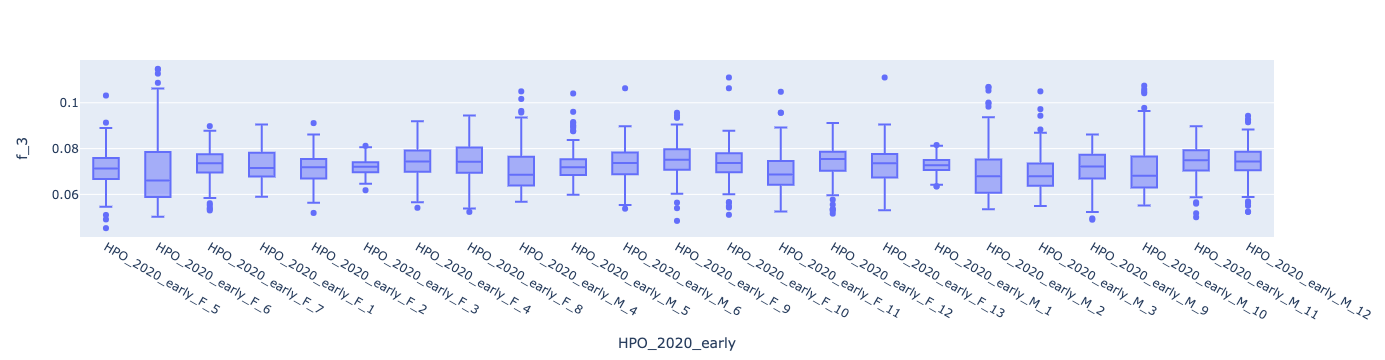

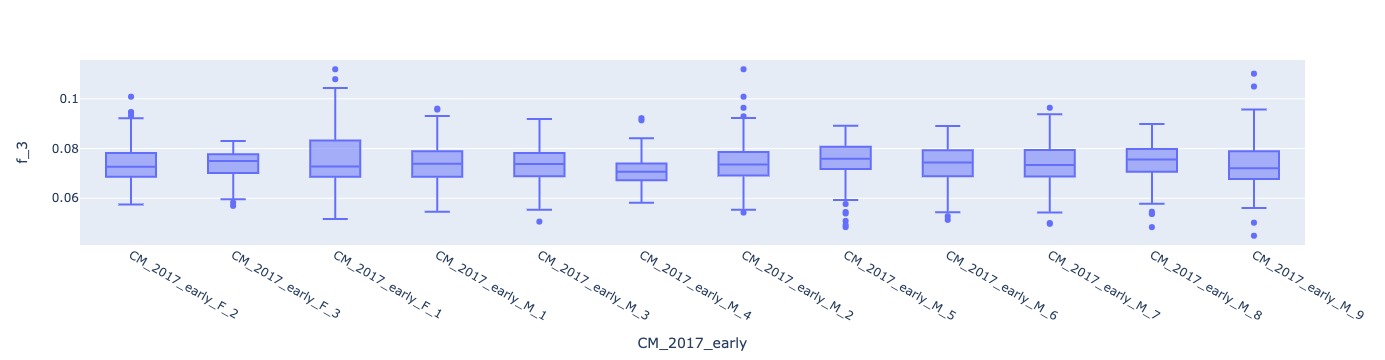

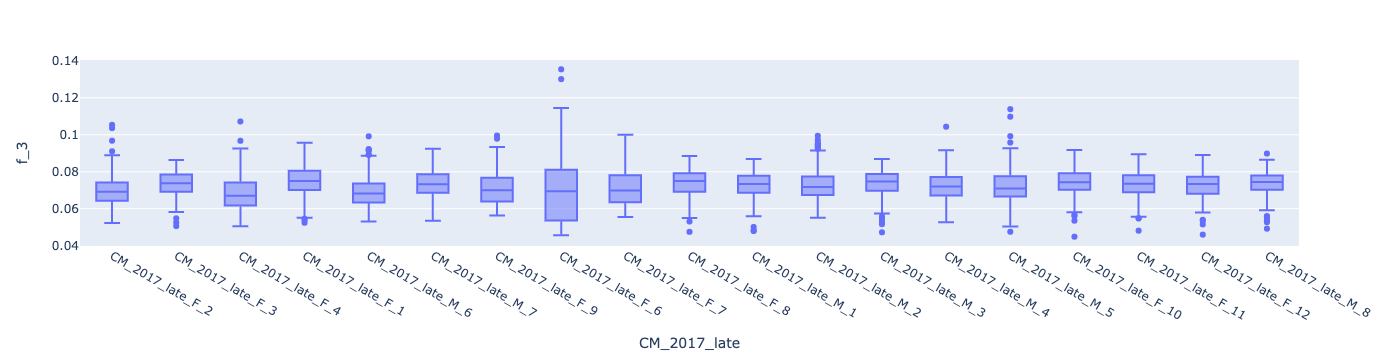

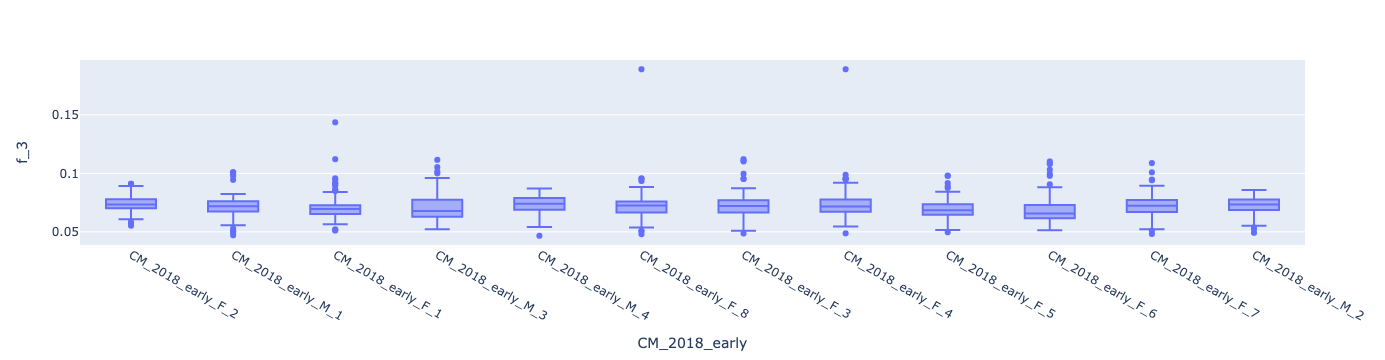

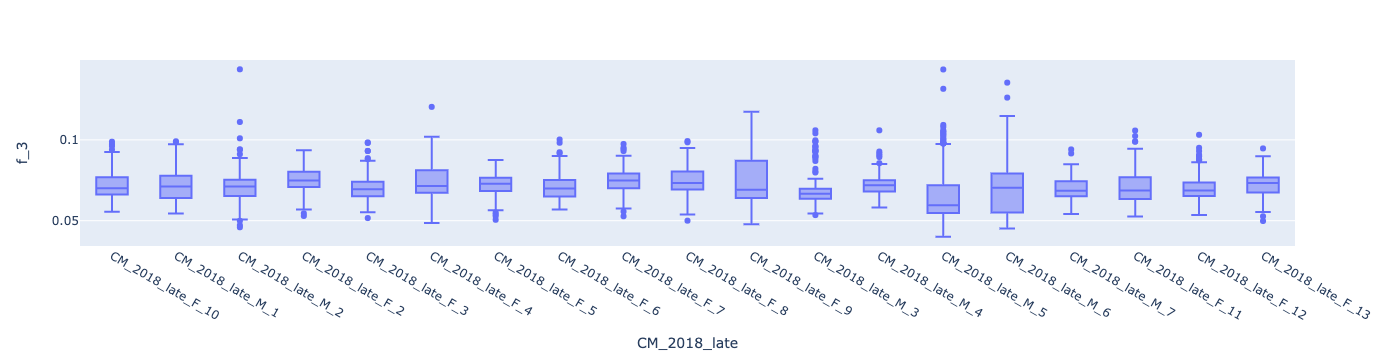

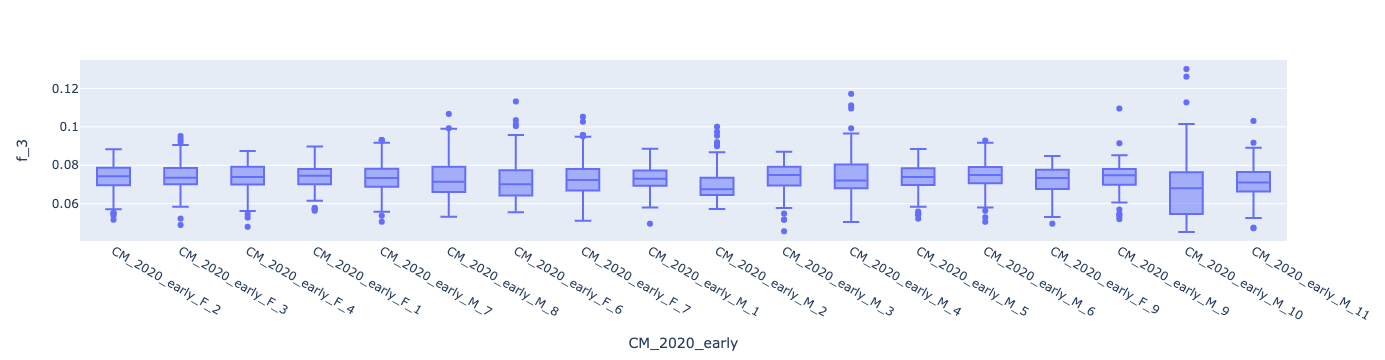

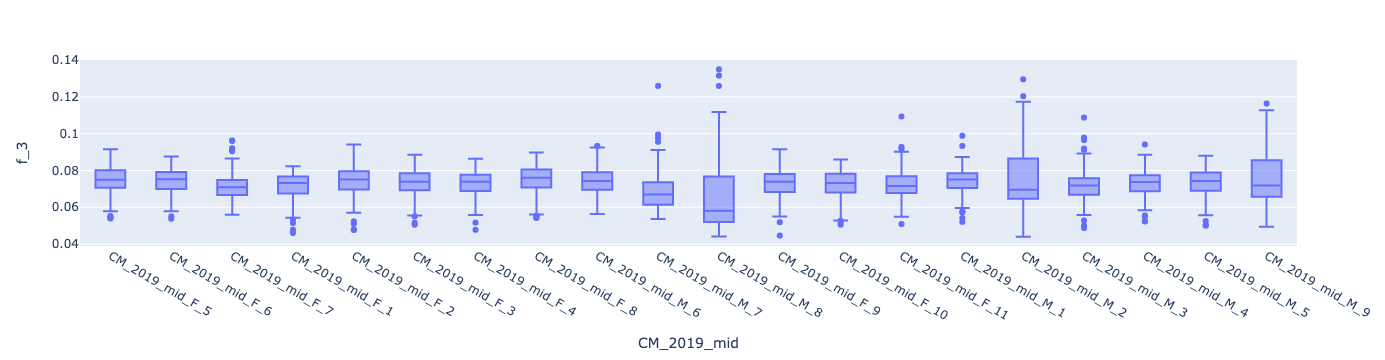

Source1          Source2         Target       f_3   Std_Err  \
0      CM_2019_late_F_10       zind_NC_06  zind_Kenya_01  0.063335  0.005590   
1      CM_2019_late_F_10       zind_NC_05  zind_Kenya_01  0.077751  0.005221   
2      CM_2019_late_F_10       zind_NC_04  zind_Kenya_01  0.072207  0.004973   
3      CM_2019_late_F_10       zind_NC_03  zind_Kenya_01  0.081732  0.006011   
4      CM_2019_late_F_10       zind_NC_02  zind_Kenya_01  0.065160  0.006673   
...                  ...              ...            ...       ...       ...   
33448    CM_2019_mid_M_9  CM_2019_mid_M_1  zind_Kenya_01  0.098869  0.009356   
33449    CM_2019_mid_M_9  CM_2019_mid_M_2  zind_Kenya_01  0.116401  0.022115   
33450    CM_2019_mid_M_9  CM_2019_mid_M_3  zind_Kenya_01  0.075661  0.007555   
33451    CM_2019_mid_M_9  CM_2019_mid_M_4  zind_Kenya_01  0.070596  0.005052   
33452    CM_2019_mid_M_9  CM_2019_mid_M_5  zind_Kenya_01  0.064399  0.004023   

       Z_value    SNPs   Sample_name Sample_name2  
0       11.329  100291  CM_2019_late           NC  
1       14.893   97315  CM_2019_late           NC  
2       14.521   98271  CM_2019_late           NC  
3       13.598   97642  CM_2019_late           NC  
4        9.765   99935  CM_2019_late           NC  
...        ...     ...           ...          ...  
33448   10.567   88609   CM_2019_mid  CM_2019_mid  
33449    5.263   88154   CM_2019_mid  CM_2019_mid  
33450   10.014   93008   CM_2019_mid  CM_2019_mid  
33451   13.974   91672   CM_2019_mid  CM_2019_mid  
33452   16.008   92786   CM_2019_mid  CM_2019_mid  

[33453 rows x 9 columns]

In [7]:
#separate the whole dataset into several mini dataset by samplename
dfCM19late = dfoutput[dfoutput['Source1'].str.startswith('CM_2019_late')]
dfHPO19mid = dfoutput[dfoutput['Source1'].str.startswith('HPO_2019_mid')]
dfMIA19June = dfoutput[dfoutput['Source1'].str.startswith('MIA_2019_June')]
dfHPO20early = dfoutput[dfoutput['Source1'].str.startswith('HPO_2020_early')]
dfCM17early = dfoutput[dfoutput['Source1'].str.startswith('CM_2017_early')]
dfCM17late = dfoutput[dfoutput['Source1'].str.startswith('CM_2017_late')]
dfCM18early = dfoutput[dfoutput['Source1'].str.startswith('CM_2018_early')]
dfCM18late = dfoutput[dfoutput['Source1'].str.startswith('CM_2018_late')]
dfCM20early = dfoutput[dfoutput['Source1'].str.startswith('CM_2020_early')]
dfCM19mid = dfoutput[dfoutput['Source1'].str.startswith('CM_2019_mid')]

"""dfCM19late
dfHPO19mid
dfMIA19June
dfHPO20early
dfCM17early
dfCM17late
dfCM18early
dfCM18late
dfCM20early
dfCM19mid"""
dfCM19late = dfCM19late.rename(columns = {'Source1':'CM_2019_late'})
dfHPO19mid = dfHPO19mid.rename(columns = {'Source1':'HPO_2019_mid'})
dfMIA19June = dfMIA19June.rename(columns = {'Source1':'MIA_2019_June'})
dfHPO20early = dfHPO20early.rename(columns = {'Source1':'HPO_2020_early'})
dfCM17early = dfCM17early.rename(columns = {'Source1':'CM_2017_early'})
dfCM17late = dfCM17late.rename(columns = {'Source1':'CM_2017_late'})
dfCM18early = dfCM18early.rename(columns = {'Source1':'CM_2018_early'})
dfCM18late = dfCM18late.rename(columns = {'Source1':'CM_2018_late'})
dfCM20early = dfCM20early.rename(columns = {'Source1':'CM_2020_early'})
dfCM19mid = dfCM19mid.rename(columns = {'Source1':'CM_2019_mid'})


#boxplot
fig1 = px.box(dfCM19late, x="CM_2019_late", y="f_3")
fig1.show()

fig2 = px.box(dfHPO19mid, x="HPO_2019_mid", y="f_3")
fig2.show()

fig3 = px.box(dfMIA19June, x="MIA_2019_June", y="f_3")
fig3.show()

fig4 = px.box(dfHPO20early, x="HPO_2020_early", y="f_3")
fig4.show()

fig5 = px.box(dfCM17early, x="CM_2017_early", y="f_3")
fig5.show()

fig6 = px.box(dfCM17late, x="CM_2017_late", y="f_3")
fig6.show()

fig7 = px.box(dfCM18early, x="CM_2018_early", y="f_3")
fig7.show()

fig8 = px.box(dfCM18late, x="CM_2018_late", y="f_3")
fig8.show()

fig9 = px.box(dfCM20early, x="CM_2020_early", y="f_3")
fig9.show()

fig10 = px.box(dfCM19mid, x="CM_2019_mid", y="f_3")
fig10.show()

dfoutput